# dev set score 파일을 불러와서 F1 score와 Pearson'sr 계산하기

In [12]:
import pandas as pd
from sklearn.metrics import classification_report
from scipy.stats import pearsonr

### 데이터

In [10]:
# dev set score 파일
path = 'https://raw.githubusercontent.com/seawavve/NLU_STS/main/result/dev_set_score.csv'
dev = pd.read_csv(path)
dev

,Unnamed: 0,guid,sentence1,sentence2,labels,binary-label,real-label,y_pred,y_real-label_pred
0,0,klue-sts-v1_dev_00000,무엇보다도 호스트분들이 너무 친절하셨습니다.,"무엇보다도, 호스트들은 매우 친절했습니다.","{'label': 4.9, 'real-label': 4.857142857142857...",1,4.857143,1,4.771169
1,1,klue-sts-v1_dev_00001,주요 관광지 모두 걸어서 이동가능합니다.,위치는 피렌체 중심가까지 걸어서 이동 가능합니다.,"{'label': 1.4, 'real-label': 1.428571428571429...",0,1.428571,0,2.981372
2,2,klue-sts-v1_dev_00002,학생들의 균형 있는 영어능력을 향상시킬 수 있는 학교 수업을 유도하기 위해 2018...,영어 영역의 경우 학생들이 한글 해석본을 암기하는 문제를 해소하기 위해 2016학년...,"{'label': 1.3, 'real-label': 1.285714285714286...",0,1.285714,0,2.945632
3,3,klue-sts-v1_dev_00003,"다만, 도로와 인접해서 거리의 소음이 들려요.","하지만, 길과 가깝기 때문에 거리의 소음을 들을 수 있습니다.","{'label': 3.7, 'real-label': 3.714285714285714...",1,3.714286,1,4.012879
4,4,klue-sts-v1_dev_00004,형이 다시 캐나다 들어가야 하니 가족모임 일정은 바꾸지 마세요.,가족 모임 일정은 바꾸지 말도록 하십시오.,"{'label': 2.5, 'real-label': 2.5, 'binary-labe...",0,2.500000,0,2.837561
...,...,...,...,...,...,...,...,...,...
514,514,klue-sts-v1_dev_00514,"문체부는 이를 연차적으로 확대, 시행해 학교운동부와 스포츠클럽 간의 연계를 강화한다.",문화체육관광부는 학교스포츠학과와 스포츠클럽의 연계성을 강화하기 위해 매년 이 프로그...,"{'label': 2.2, 'real-label': 2.2, 'binary-labe...",0,2.200000,1,4.185130
515,515,klue-sts-v1_dev_00515,일단 정확한 정보와 빠른 답변이 정말 좋았습니다.,호스트의 빠른 답변과 유용한 정보들이 정말 좋습니다.,"{'label': 2.8, 'real-label': 2.833333333333333...",0,2.833333,1,3.687774
516,516,klue-sts-v1_dev_00516,게스트에 대한 배려가 묻어나는 시설들이었습니다.,우선 공간에 대한 센스가 돋보이는 곳이었습니다.,"{'label': 0.30000000000000004, 'real-label': 0...",0,0.333333,0,1.885594
517,517,klue-sts-v1_dev_00517,밤하늘을 배경으로 ‘비대면 드론쇼’도 펼쳐진다.,‘비대면 실감형 문화공연 플랫폼’ 개념도.,"{'label': 0.30000000000000004, 'real-label': 0...",0,0.333333,0,1.224555


In [18]:
# F1 score
real_label = dev['binary-label']
predict_label = dev['y_pred']
print(classification_report(real_label, predict_label))

              precision    recall  f1-score   support

           0       0.98      0.73      0.84       299
           1       0.73      0.98      0.83       220

    accuracy                           0.84       519
   macro avg       0.85      0.85      0.84       519
weighted avg       0.87      0.84      0.84       519



In [20]:
# Pearson's r
real_label = dev['real-label']
predict_label = dev['y_real-label_pred']
print(pearsonr(real_label, predict_label)[0])

0.8822131482486593


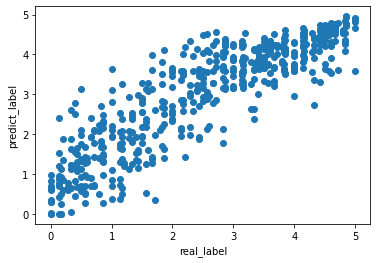

In [21]:
# 시각화
import matplotlib.pyplot as plt
plt.scatter(real_label, predict_label)
plt.xlabel('real_label')
plt.ylabel('predict_label')
plt.show()